# Project1: Restaurant Success Analysis
Team Members: Jeff Brown, Eugenio Gallastegui, Alan Garbarino, Hao Lu

-------

# <span style="color:darkgreen">Analysis of Yelp Restaurant Metrics vs.<br>Total Number of CTA Stops on a per-Zipcode Basis</span>
Author: Jeffery Brown (daddyjab)<br>
Date: 1/12/19


# <span style="color:darkblue">Summary:</span>
* This analysis is focused on the project question:<br><span style="color:darkred">_"How does transportation access impact the relative probability of success in each metropolitan area?"_</span>
<br><br>
* An analysis of Yelp Restaurant metrics vs. the number of CTA Stops in the same area suggests 3 key findings:
    1. While there does not appear to be a correlation between the Average Yelp Restaurant Ratings and the number of CTA Stops in the area, there is a range in the number of CTA stops per zipcode for which the average restaurant ratings are at a peak.
    1. There is a slight negative correlation between the Average Yelp Price (expressed as a number of dollar signs) and the number of CTA stops in the area.
    1. The median number of Yelp Restaurant Reviews within a zipcode appears to have a strong negative correlation with the number of CTA stops in that same area
<br><br>
* Areas there further investigation might be insightful are noted in the analysis below.

---

# <span style="color:darkblue">Data Gathered and Plotted</span>
* Plots are based upon a data set that was merged by zipcode using data from:
  * Yelp metrics for restaurants in Chicago provided by another member of the team member
  * Chicago CTA Transit Stop data, available in General Transit Feed Specification (GTFS) format
  * US Zipcode to mapping to latitude/longitude coordinates
<br><br> 
* Both scatter plots and bar (column) plots were generated for 3 Yelp metrics:
  1. Average Yelp Ratings per Zipcode vs. # of CTA Stops per Zipcode
  1. Average Yelp Price (# of $) per Zipcode vs. # of CTA Stops per Zipcode
  1. Median # of Yelp Reviews per Zipcode vs. # of CTA Stops per Zipcode
<br><br>
* For each plot, marker color was varied based upon the value of the Yelp metric being plotted.
* For the scatter plots, moving average trend line (window size = 5 samples) and linear trend lines were added to help highlight any trends in the data
* For the bar plots, each bar represents the median of the Yelp metric being plotted for the range of CTA Stops that comprise each "bin".  Error bars based upon the standard error of the mean are included to highlight variation in the underlying data for each bar.

---

# <span style="color:darkblue">Results</span>

## <span style="color:blue">Average Yelp Ratings per Zipcode vs. # of CTA Stops per Zipcode</span>
* As can be seen from the Scatter and Bar charts below, the Moving average trend of the Average Yelp Ratings per Zipcode seems relatively flat with little variation as the number of CTA stops per zipcode increases, except for a peak in Average Yelp ratings in zipcodes with about 270 to 300 CTA stops. 
* Each bar chart represents the Median value of the Average Yelp Ratings for restaurants in zipcodes with the indicated number of CTA stops.  As the bar chart and associated error bars highlight, the peak in ratings in the 270 to 300 CTA stop bin is above most other bins and merits additional analysis.

|Scatter|Bar|
|-----------|------------------|
|<img src="../Chart/Avg_Yelp_Ratings_vs_CTA_Stops_Scatter_and_Linear_Trend_Line.png" /> | <img src="../Chart/Avg_Yelp_Ratings_vs_CTA_Stops_Bar.png" /> |

* The Google Map in the figure below has symbols representing the 5 zipcodes that comprise the 270 to 300 CTA stop bin in the bar chart above.  These zipcodes are distributed in an area west of the loop and extending north and south of the city.
* Each of these 5 zipcode area has an average number of restaurants ranging from 2 to 78 (median of the 5 zipcodes is 10 average restaurants).
* A follow-up examination of these zipcodes could investigate the demongraphics of these areas to determine if they differ from other regions of the city in a way that explains the relatively higher ratings.
<br>

| Google Map - Figure: Average Yelp Ratings (Symbols) with CTA Stops (Heat Map) |
|-------------------------------------------------------------------------------|
|<img src="../Chart/Avg_Yelp_Ratings_Symbols_and_CTA_Stops_Heat_Peak_270-300.png" width="602" border="5"/>  |

---

## <span style="color:blue">Average Yelp Price (# of dollar signs) per Zipcode vs. # of CTA Stops per Zipcode</span>
* Moving average trend of the Average Yelp Price (# of dollar signs) per Zipcode shows a mild decline from about 100 to 300 CTA stops per zipcode.  However, as error bars in the the bar chart shows, there is a degree of variation in pricing within most bins. 
* One point worth noting is that the zipcodes having restaurants with the highest Average Yelp Price were in areas with the lowest number of CTA Stops (0 to 30 CTA stops per zipcode).  Additional investigation of the demographics of these areas might provide more insight into this data point.

|Scatter|Bar|
|-----------|------------------|
|<img src="../Chart/Avg_Yelp_Price_vs_CTA_Stops_Scatter_and_Linear_Trend_Line.png" /> | <img src="../Chart/Avg_Yelp_Price_vs_CTA_Stops_Bar.png" /> |

---

## <span style="color:blue">Median # of Yelp Reviews per Zipcode vs. # of CTA Stops per Zipcode</span>
* The comparison of the Median Number of Yelp Reviews per Zipcode vs. CTA Stops per zipcode was the most interesting aspect of this analysis.
* Moving average trend of the Median # of Yelp Reviews per Zipcode shows a clear decline across the entire range of # of CTA Stops per Zipcode values
* The distribution of individual sample points in the scatter plot and the error bars in the bar plot both seem to support that the decline is significant - _very exciting!_
* Overlaying a line plot of Median Average Price onto the bar plot of Median Number of Yelp Reviews suggests that these metrics may be related.
* This trend in the data leads to several questions that would be good next steps for analysis:
    1. What does it mean that restaurants in zipcodes with fewer CTA stops tend to have a higher number of Yelp reviews?
    1. Is there some common factor(s) influencing both Number of Yelp Reviews and Average Yelp Ratings that explains the decrease in both as Number of CTA Stops increase?
</span>

|Scatter | Bar |
|--------|-----|
|<img src="../Chart/Median_Yelp_Reviews_vs_CTA_Stops_Scatter_and_Linear_Trend_Line.png" /> | <img src="../Chart/Median_Yelp_Reviews_vs_CTA_Stops_Bar.png" /> |

| Overlay |
|---------|
| <img src="../Chart/Median_Yelp_Reviews_vs_CTA_Stops_Bar_and_Secondary_Avg_Price_Line.png" width="602" /> |


| Google Map - Figure: Average Yelp Reviews (Symbols) with CTA Stops (Heat Map) |
|-------------------------------------------------------------------------------|
| <img src="../Chart/Avg_Yelp_Reviews_Symbols_and_CTA_Stops_Heat.png" width="602" border="5"/>  |


---

# <span style="color:darkblue">Detailed Data Analysis</span>

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

import random as random
import gmaps
from pprint import pprint

import math
from scipy import stats

# Functions to find the distance between 2 lat/long coordinates
# Description: https://pypi.org/project/geopy/1.9.1/
from geopy.distance import (distance, great_circle)

# Keys
from api_config import (key_openweathermap, key_gmaps)

# Transport Helper Functions:
#   A collection of functions used with
#   Data Cleaning, Exploration, and Analysis
#   in support of Transport Data Analysis with Project 1
from transport_helper_functions import *


# Get the Cleaned and Merged Data for Analysis

In [2]:
# Read in the merged Restaurant and Chicago CTA stop + zipcode info previously cleaned/saved
i_file = "../Data/merged_restaurants_and_CTA_stops.csv"

# Read the data into a dataframe
merged_rest_df = pd.read_csv(i_file, index_col='zip')
merged_rest_df.head()

,Total Restaurants,Avg Rating,Total Reviews,Median Reviews,Avg Reviews,Avg Price (# of $),Total CTA Stops,Latitude,Longitude
zip,,,,,,,,,
60601,14,3.500000,11535,397.5,823.928571,1.928571,52.0,41.885310,-87.622116
60602,11,3.863636,4086,390.0,371.454545,1.454545,39.0,41.883073,-87.629149
60603,25,3.680000,14205,509.0,568.200000,2.040000,11.0,41.880188,-87.625509
60604,2,4.000000,813,406.5,406.500000,1.500000,58.0,41.878095,-87.628461
60605,32,3.953125,14871,334.0,464.718750,1.875000,60.0,41.867566,-87.617228


In [3]:
merged_rest_df.describe()

,Total Restaurants,Avg Rating,Total Reviews,Median Reviews,Avg Reviews,Avg Price (# of $),Total CTA Stops,Latitude,Longitude
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,55.000000,55.000000,55.000000
mean,27.684211,3.797355,9800.315789,182.921053,253.762122,1.650841,176.618182,41.869512,-87.673519
std,23.903196,0.336161,13880.941653,163.087586,237.742327,0.301364,89.998866,0.091434,0.062758
min,1.000000,2.652174,11.000000,8.000000,9.842105,1.000000,11.000000,41.663809,-87.827132
25%,10.000000,3.612903,681.000000,49.000000,85.111111,1.451613,101.000000,41.805907,-87.712374
50%,20.000000,3.868421,3694.000000,131.000000,164.541667,1.692308,191.000000,41.882066,-87.662604
75%,32.000000,4.000000,13682.000000,306.000000,406.260870,1.869565,240.000000,41.943241,-87.628805
max,83.000000,4.500000,62914.000000,753.500000,1165.074074,2.425926,386.000000,42.010019,-87.552739


In [4]:
# Drop any rows that do not have CTA Stop data or Lat/Long coords
merged_rest_df.dropna(how='any', inplace=True)
merged_rest_df.count()

Total Restaurants     55
Avg Rating            55
Total Reviews         55
Median Reviews        55
Avg Reviews           55
Avg Price (# of $)    55
Total CTA Stops       55
Latitude              55
Longitude             55
dtype: int64

# Analysis
## Comparison of ratings and transit stop density on per-zipcode basis using scatter plots

LinregressResult(slope=8.869795568206205e-05, intercept=3.8079176735476463, rvalue=0.02652581708492909, pvalue=0.8475573183961338, stderr=0.00045914944349729125)


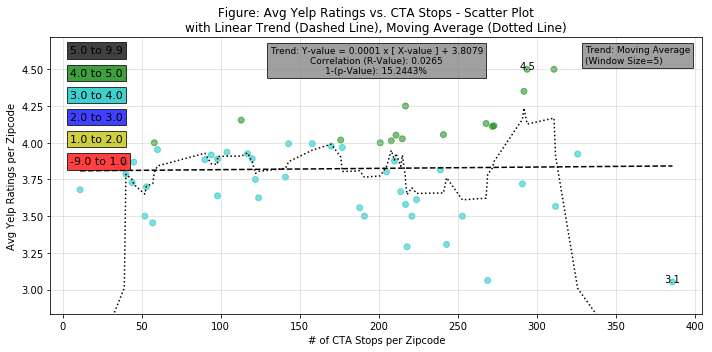

In [6]:
# Generate linear trend line
tl = gen_linear_trend( list(merged_rest_df['Total CTA Stops']), list(merged_rest_df['Avg Rating']) )

# Setup plot characteristics - including linear trend (dashed line) and moving average (dotted line)
plot_dict = {
    'chart_title':'Figure: Avg Yelp Ratings vs. CTA Stops - Scatter Plot\nwith Linear Trend (Dashed Line), Moving Average (Dotted Line)',
    'save_file':'../Chart/Avg_Yelp_Ratings_vs_CTA_Stops_Scatter_and_Linear_Trend_Line.png',

    'data_df':merged_rest_df,
    'y_label':'Avg Yelp Ratings per Zipcode',
    'y_column':'Avg Rating',
    'color_list':'krybcgk',
    'color_thresh':[-9.0, 1.0, 2.0, 3.0, 4.0, 5.0, 9.9],

    'data_trend': tl['trend_line'],
    'data_trend_label': tl['trend_label'],
    'data_trend_label_loc_h': 0.5,
    'data_trend_label_loc_v': 0.97,
    
    'ma_window_size':5,
    'ma_label_loc_h': 0.82,
    'ma_label_loc_v': 0.90,

    'x_label':'# of CTA Stops per Zipcode',
    'x_column':'Total CTA Stops'
}

# Generate the scatter plot
gen_scatter_plot(plot_dict)


### Quick Analysis of Above: "Figure: Avg Yelp Ratings vs. CTA Stops - Scatter Plot"
* Moving average trend of the Average Yelp Ratings per Zipcode seems relatively flat or a fairly mild decline until about 300 CTA stops per zipcode, which shows an increase.
* Follow-up analysis with bar plots using bins based upon the # of CTA Stops per Zipcode might provide an visual indication of the variation and its significance

LinregressResult(slope=-0.0008765171847427396, intercept=1.811925943419076, rvalue=-0.27126379296222297, pvalue=0.045147995178772306, stderr=0.00042720239940407037)


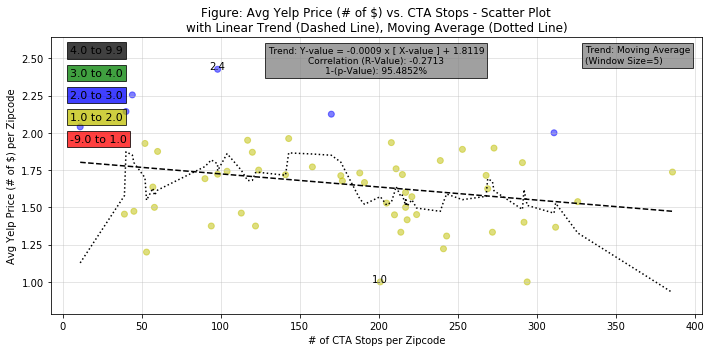

In [7]:
# Generate linear trend line
tl = gen_linear_trend( list(merged_rest_df['Total CTA Stops']), list(merged_rest_df['Avg Price (# of $)']) )

# Setup plot characteristics - including linear trend (dashed line) and moving average (dotted line)
plot_dict = {
    'chart_title':'Figure: Avg Yelp Price (# of $) vs. CTA Stops - Scatter Plot\nwith Linear Trend (Dashed Line), Moving Average (Dotted Line)',
    'save_file':'../Chart/Avg_Yelp_Price_vs_CTA_Stops_Scatter_and_Linear_Trend_Line.png',

    'data_df':merged_rest_df,
    'y_label':'Avg Yelp Price (# of $) per Zipcode',
    'y_column':'Avg Price (# of $)',
    'color_list':'krybgk',
    'color_thresh':[-9.0, 1.0, 2.0, 3.0, 4.0,9.9],

    'data_trend': tl['trend_line'],
    'data_trend_label': tl['trend_label'],
    'data_trend_label_loc_h': 0.5,
    'data_trend_label_loc_v': 0.97,
    
    'ma_window_size':5,
    'ma_label_loc_h': 0.82,
    'ma_label_loc_v': 0.90,

    'x_label':'# of CTA Stops per Zipcode',
    'x_column':'Total CTA Stops'
}

# Generate the scatter plot
gen_scatter_plot(plot_dict)

### Quick Analysis of Above: "Figure: Avg Yelp Price (# of $) vs. CTA Stops - Scatter Plot"

* Moving average trend of the Average Yelp Price (# of $) per Zipcode seems to show a mild decline starting with about 100 CTA stops per zipcode
* As with previous figure, will follow-up with bar plots

LinregressResult(slope=-0.9575010078401611, intercept=354.902996184715, rvalue=-0.5212604732554644, pvalue=4.493717288991988e-05, stderr=0.21532672974495018)


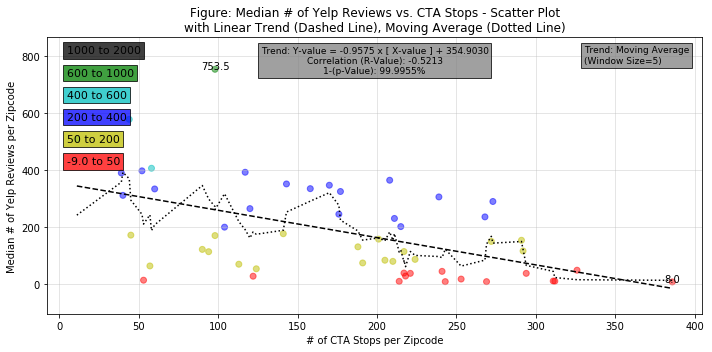

In [8]:
# Generate linear trend line
tl = gen_linear_trend( list(merged_rest_df['Total CTA Stops']), list(merged_rest_df['Median Reviews']) )

# Setup plot characteristics - including linear trend (dashed line) and moving average (dotted line)
plot_dict = {
    'chart_title':'Figure: Median # of Yelp Reviews vs. CTA Stops - Scatter Plot\nwith Linear Trend (Dashed Line), Moving Average (Dotted Line)',
    'save_file':'../Chart/Median_Yelp_Reviews_vs_CTA_Stops_Scatter_and_Linear_Trend_Line.png',

    'data_df':merged_rest_df,
    'y_label':'Median # of Yelp Reviews per Zipcode',
    'y_column':'Median Reviews',
    'color_list':'krybcgk',
    'color_thresh':[-9.0, 50, 200, 400, 600, 1000, 2000],

    'data_trend': tl['trend_line'],
    'data_trend_label': tl['trend_label'],
    'data_trend_label_loc_h': 0.5,
    'data_trend_label_loc_v': 0.97,
    
    'ma_window_size':5,
    'ma_label_loc_h': 0.82,
    'ma_label_loc_v': 0.90,

    'x_label':'# of CTA Stops per Zipcode',
    'x_column':'Total CTA Stops'
}

# Generate the scatter plot
gen_scatter_plot(plot_dict)


### Quick Analysis of Above: "Figure: Median # of Yelp Reviews vs. CTA Stops - Scatter Plot"
* Most interesting plot so far.
* Moving average trend of the Median # of Yelp Reviews per Zipcode shows a clear decline across the entire range of # of CTA Stops per Zipcode values
* As with previous figures, will follow-up with boxplots, but the distribution of individual sample points seem to show the same pattern of decline - _very exciting!_
* Questions to consider:
    * What does it mean that restaurants in zipcodes with fewer CTA stops tend to have a higher number of Yelp reviews?
    * And, what does it mean it the context of the other relationships plotted above?

## Comparison of ratings and transit stop density on per-zipcode basis using bar charts with error bars (or box plots)

### Create bins based upon # of CTA Stops per Zipcode for use in bar and boxplot charts

In [13]:
# Define size of each bin for 'Total CTA Stops'
bin_size = 30

# Set the bin min and max based upon the range of values in 'Total CTA Stops'
x_val_min = round(merged_rest_df['Total CTA Stops'].min(),-2)
x_val_max = round(merged_rest_df['Total CTA Stops'].max(),-2)

# Create the bins, and be sure to include a binfor x_val_max
# Note: Bins are [lower, upper)
bin_thresh = list(np.arange(x_val_min, x_val_max+bin_size, bin_size))

In [14]:
# Create bins for based upon the Actual Latitude of the cities
cta_stop_bins = pd.cut(x=merged_rest_df['Total CTA Stops'], bins=bin_thresh, right=False)
cta_stop_bins.head()

zip
60601    [30.0, 60.0)
60602    [30.0, 60.0)
60603     [0.0, 30.0)
60604    [30.0, 60.0)
60605    [60.0, 90.0)
Name: Total CTA Stops, dtype: category
Categories (14, interval[float64]): [[0.0, 30.0) < [30.0, 60.0) < [60.0, 90.0) < [90.0, 120.0) ... [300.0, 330.0) < [330.0, 360.0) < [360.0, 390.0) < [390.0, 420.0)]

In [15]:
merged_rest_df['Total CTA Stops Bin'] = cta_stop_bins
merged_rest_df.head()

,Total Restaurants,Avg Rating,Total Reviews,Median Reviews,Avg Reviews,Avg Price (# of $),Total CTA Stops,Latitude,Longitude,Total CTA Stops Bin
zip,,,,,,,,,,
60601,14,3.500000,11535,397.5,823.928571,1.928571,52.0,41.885310,-87.622116,"[30.0, 60.0)"
60602,11,3.863636,4086,390.0,371.454545,1.454545,39.0,41.883073,-87.629149,"[30.0, 60.0)"
60603,25,3.680000,14205,509.0,568.200000,2.040000,11.0,41.880188,-87.625509,"[0.0, 30.0)"
60604,2,4.000000,813,406.5,406.500000,1.500000,58.0,41.878095,-87.628461,"[30.0, 60.0)"
60605,32,3.953125,14871,334.0,464.718750,1.875000,60.0,41.867566,-87.617228,"[60.0, 90.0)"


In [16]:
# Create grouping of the data based upon the bins
c_cta_stop_bin_g = merged_rest_df.groupby('Total CTA Stops Bin')

#### Generate DataFrame using Median as the aggregation function
* This means that the per-CTA Stop binned aggregates will be "Median of Averages" or "Median of Medians" of the underlying data in the merged dataframe
* Question: Would there be a significant difference in the results if we used Average (mean) as the aggregation function for the per-CFA Stop binned aggregates?

In [17]:
# Calculate median values
agg_dict= {'Total Restaurants':np.median,
           'Avg Rating':np.median,
           'Total Reviews':np.median,
           'Median Reviews':np.median,
           'Avg Reviews':np.median,
           'Avg Price (# of $)':np.median,
           'Avg Reviews':np.median,
          }

c_cta_stop_bin_df = c_cta_stop_bin_g.agg(agg_dict).reset_index(drop=False)
c_cta_stop_bin_df.head()

,Total CTA Stops Bin,Total Restaurants,Avg Rating,Total Reviews,Median Reviews,Avg Reviews,Avg Price (# of $)
0,"[0.0, 30.0)",25.0,3.680000,14205.0,509.00,568.200000,2.040000
1,"[30.0, 60.0)",12.5,3.757264,5067.5,350.75,388.977273,1.568182
2,"[60.0, 90.0)",32.0,3.953125,14871.0,334.00,464.718750,1.875000
3,"[90.0, 120.0)",24.0,3.916667,3949.0,170.50,172.444444,1.722222
4,"[120.0, 150.0)",23.0,3.765625,9344.0,177.00,201.578125,1.750000


In [18]:
# Calculate the standard error of the means
agg_dict= {'Total Restaurants':stats.sem,
           'Avg Rating':stats.sem,
           'Total Reviews':stats.sem,
           'Median Reviews':stats.sem,
           'Avg Reviews':stats.sem,
           'Avg Price (# of $)':stats.sem,
           'Avg Reviews':stats.sem,
          }

c_cta_stop_bin_sem_df = c_cta_stop_bin_g.agg(agg_dict).reset_index(drop=False)
c_cta_stop_bin_sem_df.head()

C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Total CTA Stops Bin,Total Restaurants,Avg Rating,Total Reviews,Median Reviews,Avg Reviews,Avg Price (# of $)
0,"[0.0, 30.0)",NaN,NaN,NaN,NaN,NaN,NaN
1,"[30.0, 60.0)",6.433555,0.065769,5653.485406,68.097615,106.191028,0.131002
2,"[60.0, 90.0)",NaN,NaN,NaN,NaN,NaN,NaN
3,"[90.0, 120.0)",5.070255,0.056667,8336.085957,91.178508,143.482559,0.131190
4,"[120.0, 150.0)",14.636940,0.063242,7134.185441,61.443551,86.490707,0.099879


### Generate bar plots based upon # of CTA Stops per Zipcode

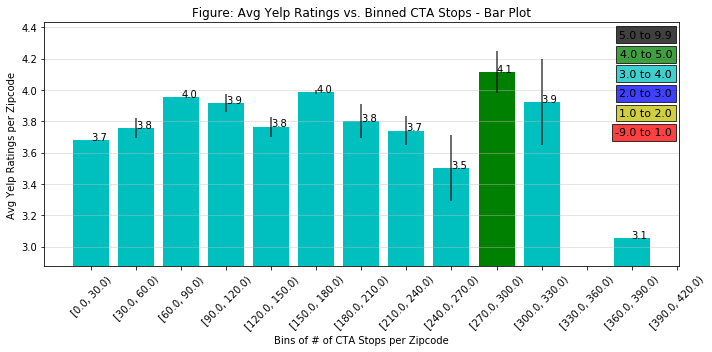

In [19]:
# 
plot_dict = {
    'data_df':c_cta_stop_bin_df,
    'data_sem_df':c_cta_stop_bin_sem_df,
    'y_column':'Avg Rating',
    'x_column':'Total CTA Stops Bin',
    'color_list':'krybcgk',
    'color_thresh':[-9.0, 1.0, 2.0, 3.0, 4.0, 5.0, 9.9],
    'chart_title':'Figure: Avg Yelp Ratings vs. Binned CTA Stops - Bar Plot',
    'y_label':'Avg Yelp Ratings per Zipcode',
    'x_label':'Bins of # of CTA Stops per Zipcode',
    'save_file':'../Chart/Avg_Yelp_Ratings_vs_CTA_Stops_Bar.png'
}

gen_bar_plot(plot_dict)

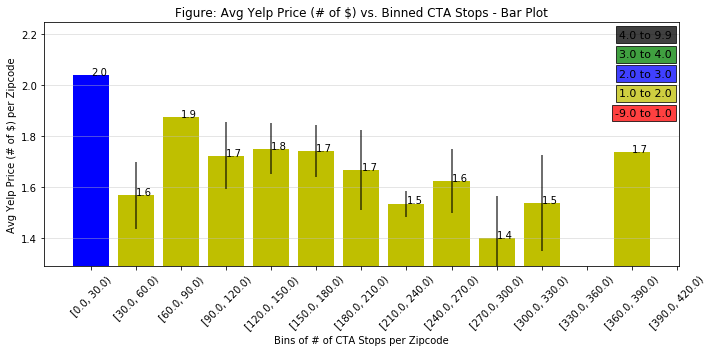

In [20]:
# 
plot_dict = {
    'data_df':c_cta_stop_bin_df,
    'data_sem_df':c_cta_stop_bin_sem_df,
    'y_column':'Avg Price (# of $)',
    'x_column':'Total CTA Stops Bin',
    'color_list':'krybgk',
    'color_thresh':[-9.0, 1.0, 2.0, 3.0, 4.0,9.9],
    'chart_title':'Figure: Avg Yelp Price (# of $) vs. Binned CTA Stops - Bar Plot',
    'y_label':'Avg Yelp Price (# of $) per Zipcode',
    'x_label':'Bins of # of CTA Stops per Zipcode',
    'save_file':'../Chart/Avg_Yelp_Price_vs_CTA_Stops_Bar.png'
}

gen_bar_plot(plot_dict)

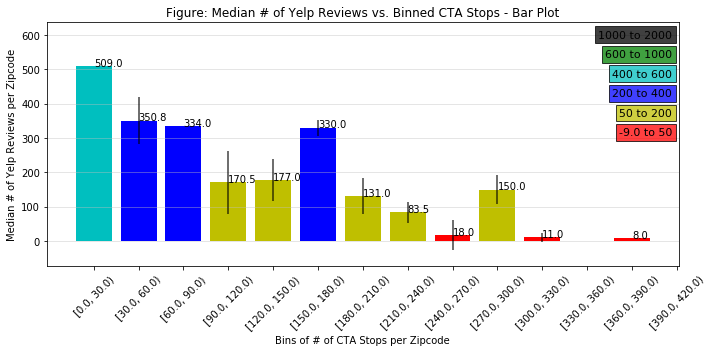

In [21]:
# 
plot_dict = {
    'data_df':c_cta_stop_bin_df,
    'data_sem_df':c_cta_stop_bin_sem_df,
    'y_column':'Median Reviews',
    'x_column':'Total CTA Stops Bin',
    'color_list':'krybcgk',
    'color_thresh':[-9.0, 50, 200, 400, 600, 1000, 2000],
    'ma_window_size':5,
    'chart_title':'Figure: Median # of Yelp Reviews vs. Binned CTA Stops - Bar Plot',
    'y_label':'Median # of Yelp Reviews per Zipcode',
    'x_label':'Bins of # of CTA Stops per Zipcode',
    'save_file':'../Chart/Median_Yelp_Reviews_vs_CTA_Stops_Bar.png'
}

gen_bar_plot(plot_dict)

## <span style="color:darkblue">Follow-up On Initial Results</span>
### <span style="color:blue">Average Yelp Ratings per Zipcode vs. # of CTA Stops per Zipcode</span>

|Scatter|Bar|
|-----------|------------------|
|<img src="../Chart/Avg_Yelp_Ratings_vs_CTA_Stops_Scatter.png" /> | <img src="../Chart/Avg_Yelp_Ratings_vs_CTA_Stops_Bar.png" /> |

* Moving average trend of the Average Yelp Ratings per Zipcode seems relatively flat or a fairly mild decline until about 300 CTA stops per zipcode, which shows a peak.
* <span style="color:maroon">Questions to consider:
    * What zipcodes are associated with the peak value at around 300 CTA stops per zipcode?
    * What demographic or other factors might shed light on this peak?
</span>

In [26]:
c_cta_stop_bin_df

,Total CTA Stops Bin,Total Restaurants,Avg Rating,Total Reviews,Median Reviews,Avg Reviews,Avg Price (# of $)
0,"[0.0, 30.0)",25.0,3.680000,14205.0,509.00,568.200000,2.040000
1,"[30.0, 60.0)",12.5,3.757264,5067.5,350.75,388.977273,1.568182
2,"[60.0, 90.0)",32.0,3.953125,14871.0,334.00,464.718750,1.875000
3,"[90.0, 120.0)",24.0,3.916667,3949.0,170.50,172.444444,1.722222
4,"[120.0, 150.0)",23.0,3.765625,9344.0,177.00,201.578125,1.750000
5,"[150.0, 180.0)",72.0,3.985269,30771.0,330.00,440.514769,1.741792
6,"[180.0, 210.0)",26.0,3.801887,4438.0,131.00,158.000000,1.666667
7,"[210.0, 240.0)",22.5,3.740310,1922.0,83.50,99.708065,1.535714
8,"[240.0, 270.0)",13.0,3.500000,681.0,18.00,75.666667,1.625000
9,"[270.0, 300.0)",10.0,4.115385,1243.0,150.00,138.111111,1.400000


In [28]:
merged_rest_df.describe()

,Total Restaurants,Avg Rating,Total Reviews,Median Reviews,Avg Reviews,Avg Price (# of $),Total CTA Stops,Latitude,Longitude
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,28.236364,3.823583,10061.545455,185.790909,256.811180,1.657117,176.618182,41.869512,-87.673519
std,24.074701,0.300941,14058.017414,165.318511,241.378175,0.290808,89.998866,0.091434,0.062758
min,1.000000,3.052632,11.000000,8.000000,9.842105,1.000000,11.000000,41.663809,-87.827132
25%,10.500000,3.631944,747.000000,47.000000,83.388889,1.453079,101.000000,41.805907,-87.712374
50%,20.000000,3.875000,3694.000000,150.000000,164.541667,1.692308,191.000000,41.882066,-87.662604
75%,37.000000,4.000000,13943.500000,308.750000,406.380435,1.841759,240.000000,41.943241,-87.628805
max,83.000000,4.500000,62914.000000,753.500000,1165.074074,2.425926,386.000000,42.010019,-87.552739


### The 5 zip codes that represent the peak in Median Avg Yelp Rating for Zipcodes with 270-300 CTA stops

In [29]:
# The 5 zip codes that represent the peak in Median Avg Yelp Rating for Zipcodes with 270-300 CTA stops
merged_rest_df[ merged_rest_df['Total CTA Stops Bin'] == pd.Interval(270.0, 300.0, closed='left') ]

,Total Restaurants,Avg Rating,Total Reviews,Median Reviews,Avg Reviews,Avg Price (# of $),Total CTA Stops,Latitude,Longitude,Total CTA Stops Bin
zip,,,,,,,,,,
60609,2,4.500000,76,38.0,38.000000,1.000000,294.0,41.812680,-87.656935,"[270.0, 300.0)"
60612,9,4.111111,1243,150.0,138.111111,1.333333,272.0,41.880320,-87.687749,"[270.0, 300.0)"
60623,10,4.350000,1104,116.5,110.400000,1.400000,292.0,41.848897,-87.717661,"[270.0, 300.0)"
60641,25,3.720000,4492,154.0,179.680000,1.800000,291.0,41.946606,-87.746787,"[270.0, 300.0)"
60647,78,4.115385,31908,290.0,409.076923,1.897436,273.0,41.921215,-87.701028,"[270.0, 300.0)"


#### Let's add to the bar chart a line showing the per-bin Median "Total Restaurants" to see if there's a correlation
* Modified the bar plotting function to optionally plot another series of data in the same dataframe on a secondary axis on the same chart
* The bar plot of Avg Yelp Ratings with secondary plots of Total Restaurants, Median Reviews, and Total Reviews don't show any strong correlations
* The bar plot of Avg Yelp Ratings with secondary plot of Avg Price also does not show a strong overall correlation, but, it is interesting to note that the bin that has the highest Median Avg Yelp Rating [270.0, 300.0) also has the lowest Median Avg Price.  Coincidence?  Some other factor to consider?

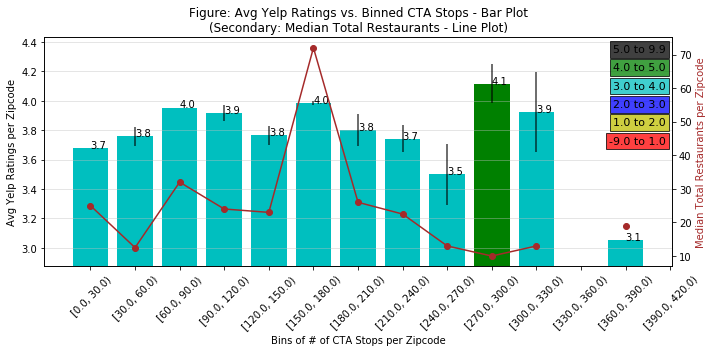

In [30]:
# 
plot_dict = {
    'chart_title':'Figure: Avg Yelp Ratings vs. Binned CTA Stops - Bar Plot\n(Secondary: Median Total Restaurants - Line Plot)',
    'save_file':'../Chart/Avg_Yelp_Ratings_vs_CTA_Stops_Bar_and_Secondary_Median_Total_Restaurants_Line.png',

    'data_df':c_cta_stop_bin_df,
    'data_sem_df':c_cta_stop_bin_sem_df,
    'y_label':'Avg Yelp Ratings per Zipcode',
    'y_column':'Avg Rating',
    'color_list':'krybcgk',
    'color_thresh':[-9.0, 1.0, 2.0, 3.0, 4.0, 5.0, 9.9],

    'y2_label':'Median Total Restaurants per Zipcode',
    'y2_column':'Total Restaurants',

    'x_label':'Bins of # of CTA Stops per Zipcode',
    'x_column':'Total CTA Stops Bin'
}

gen_bar_plot(plot_dict)

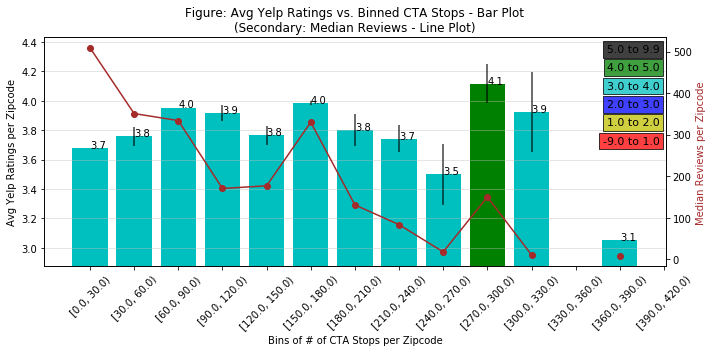

In [31]:
# 
plot_dict = {
    'chart_title':'Figure: Avg Yelp Ratings vs. Binned CTA Stops - Bar Plot\n(Secondary: Median Reviews - Line Plot)',
    'save_file':'../Chart/Avg_Yelp_Ratings_vs_CTA_Stops_Bar_and_Secondary_Median_Reviews_Line.png',

    'data_df':c_cta_stop_bin_df,
    'data_sem_df':c_cta_stop_bin_sem_df,
    'y_label':'Avg Yelp Ratings per Zipcode',
    'y_column':'Avg Rating',
    'color_list':'krybcgk',
    'color_thresh':[-9.0, 1.0, 2.0, 3.0, 4.0, 5.0, 9.9],

    'y2_label':'Median Reviews per Zipcode',
    'y2_column':'Median Reviews',

    'x_label':'Bins of # of CTA Stops per Zipcode',
    'x_column':'Total CTA Stops Bin'
}

gen_bar_plot(plot_dict)

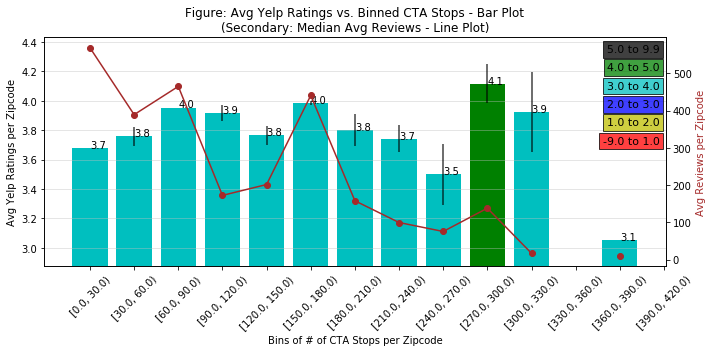

In [32]:
# 
plot_dict = {
    'chart_title':'Figure: Avg Yelp Ratings vs. Binned CTA Stops - Bar Plot\n(Secondary: Median Avg Reviews - Line Plot)',
    'save_file':'../Chart/Avg_Yelp_Ratings_vs_CTA_Stops_Bar_and_Secondary_Avg_Reviews_Line.png',

    'data_df':c_cta_stop_bin_df,
    'data_sem_df':c_cta_stop_bin_sem_df,
    'y_label':'Avg Yelp Ratings per Zipcode',
    'y_column':'Avg Rating',
    'color_list':'krybcgk',
    'color_thresh':[-9.0, 1.0, 2.0, 3.0, 4.0, 5.0, 9.9],

    'y2_label':'Avg Reviews per Zipcode',
    'y2_column':'Avg Reviews',

    'x_label':'Bins of # of CTA Stops per Zipcode',
    'x_column':'Total CTA Stops Bin'
}

gen_bar_plot(plot_dict)

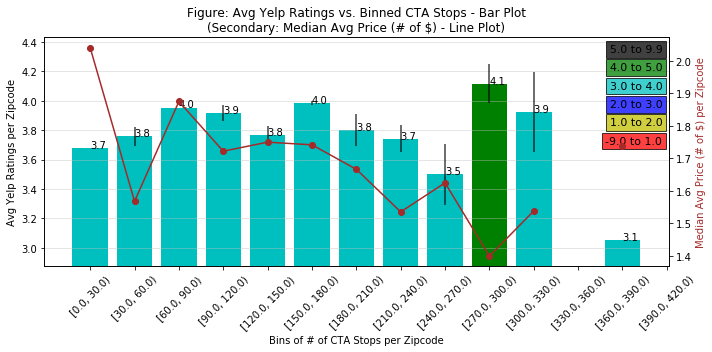

In [33]:
# 
plot_dict = {
    'chart_title':'Figure: Avg Yelp Ratings vs. Binned CTA Stops - Bar Plot\n(Secondary: Median Avg Price (# of $) - Line Plot)',
    'save_file':'../Chart/Avg_Yelp_Ratings_vs_CTA_Stops_Bar_and_Secondary_Avg_Price_Line.png',

    'data_df':c_cta_stop_bin_df,
    'data_sem_df':c_cta_stop_bin_sem_df,
    'y_label':'Avg Yelp Ratings per Zipcode',
    'y_column':'Avg Rating',
    'color_list':'krybcgk',
    'color_thresh':[-9.0, 1.0, 2.0, 3.0, 4.0, 5.0, 9.9],

    'y2_label':'Median Avg Price (# of $) per Zipcode',
    'y2_column':'Avg Price (# of $)',

    'x_label':'Bins of # of CTA Stops per Zipcode',
    'x_column':'Total CTA Stops Bin'
}

gen_bar_plot(plot_dict)

### <span style="color:blue">Average Yelp Price (# of $) per Zipcode vs. # of CTA Stops per Zipcode</span>

|Scatter|Bar|
|-----------|------------------|
|<img src="../Chart/Avg_Yelp_Price_vs_CTA_Stops_Scatter.png" /> | <img src="../Chart/Avg_Yelp_Price_vs_CTA_Stops_Bar.png" /> |

* Moving average trend of the Average Yelp Price (# of $) per Zipcode seems to show a mild decline starting with about 100 CTA stops per zipcode
* A linear regression across at least a range of # of CTA Stop values may be relevant.
<br>


#### Let's add some secondary plots to see if anything looks interesting
* After trying several plots, plots of Median Avg Yelp Price per Zipcode w/ Median Reviews per Zipcode appear to show some correlation.  Will check for this with a linear regression - below...
* Will also add a linear trend line - below...

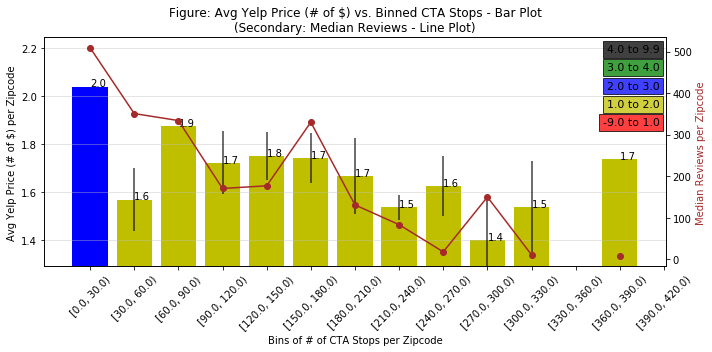

In [34]:
# 
plot_dict = {
    'chart_title':'Figure: Avg Yelp Price (# of $) vs. Binned CTA Stops - Bar Plot\n(Secondary: Median Reviews - Line Plot)',
    'save_file':'../Chart/Avg_Yelp_Price_vs_CTA_Stops_Bar_and_Secondary_Median_Reviews_Line.png',

    'data_df':c_cta_stop_bin_df,
    'data_sem_df':c_cta_stop_bin_sem_df,
    'y_label':'Avg Yelp Price (# of $) per Zipcode',
    'y_column':'Avg Price (# of $)',
    'color_list':'krybgk',
    'color_thresh':[-9.0, 1.0, 2.0, 3.0, 4.0,9.9],

    'y2_label':'Median Reviews per Zipcode',
    'y2_column':'Median Reviews',

    'x_label':'Bins of # of CTA Stops per Zipcode',
    'x_column':'Total CTA Stops Bin'
}

gen_bar_plot(plot_dict)


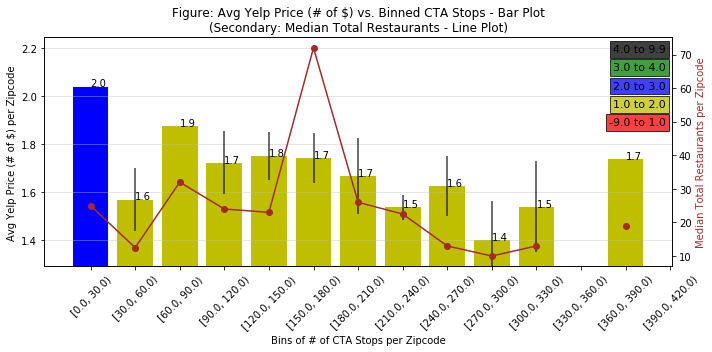

In [35]:
# 
plot_dict = {
    'chart_title':'Figure: Avg Yelp Price (# of $) vs. Binned CTA Stops - Bar Plot\n(Secondary: Median Total Restaurants - Line Plot)',
    'save_file':'../Chart/Avg_Yelp_Price_vs_CTA_Stops_Bar_and_Secondary_Total_Restaurants_Line.png',

    'data_df':c_cta_stop_bin_df,
    'data_sem_df':c_cta_stop_bin_sem_df,
    'y_label':'Avg Yelp Price (# of $) per Zipcode',
    'y_column':'Avg Price (# of $)',
    'color_list':'krybgk',
    'color_thresh':[-9.0, 1.0, 2.0, 3.0, 4.0,9.9],

    'y2_label':'Median Total Restaurants per Zipcode',
    'y2_column':'Total Restaurants',

    'x_label':'Bins of # of CTA Stops per Zipcode',
    'x_column':'Total CTA Stops Bin'
}

gen_bar_plot(plot_dict)


### <span style="color:blue">Median # of Yelp Reviews per Zipcode vs. # of CTA Stops per Zipcode</span>

|Scatter|Bar|
|-----------|------------------|
|<img src="../Chart/Median_Yelp_Reviews_vs_CTA_Stops_Scatter.png" /> | <img src="../Chart/Median_Yelp_Reviews_vs_CTA_Stops_Bar.png" /> |

* Most interesting plot so far.
* Moving average trend of the Median # of Yelp Reviews per Zipcode shows a clear decline across the entire range of # of CTA Stops per Zipcode values
* The distribution of individual sample points in the scatter plot and the error bars in the bar plot both seem to support that the decline is significant - _very exciting!_
* Expecting that a linear regression across will show a usable trend.
* <span style="color:maroon">Questions to consider:
    * What does it mean that restaurants in zipcodes with fewer CTA stops tend to have a higher number of Yelp reviews?
    * And, what does it mean it the context of the other relationships plotted above?
</span>
<br>

#### Let's add some secondary plots to see what looks interesting
* As noted before, a clear apparent relationship between Median # of Yelp Reviews per Zipcode and Median Avg Price. (FYI: The complementary bar plot Median Avg Price w/ secondary Median # of Yelp Reviews per Zipcode is probably better visually)
* Correlation of Median # of Yelp Reviews per Zipcode with Median Avg Ratings is not as clear -- will wait for regression analysis (below)

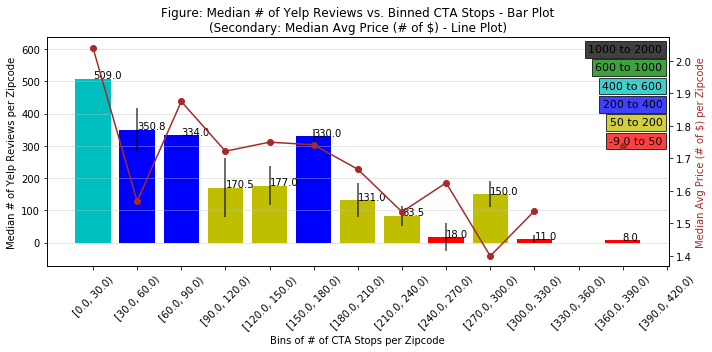

In [36]:
# 
plot_dict = {
    'chart_title':'Figure: Median # of Yelp Reviews vs. Binned CTA Stops - Bar Plot\n(Secondary: Median Avg Price (# of $) - Line Plot)',
    'save_file':'../Chart/Median_Yelp_Reviews_vs_CTA_Stops_Bar_and_Secondary_Avg_Price_Line.png',

    'data_df':c_cta_stop_bin_df,
    'data_sem_df':c_cta_stop_bin_sem_df,
    'y_label':'Median # of Yelp Reviews per Zipcode',
    'y_column':'Median Reviews',
    'color_list':'krybcgk',
    'color_thresh':[-9.0, 50, 200, 400, 600, 1000, 2000],

    'y2_label':'Median Avg Price (# of $) per Zipcode',
    'y2_column':'Avg Price (# of $)',

    'x_label':'Bins of # of CTA Stops per Zipcode',
    'x_column':'Total CTA Stops Bin'
}

gen_bar_plot(plot_dict)

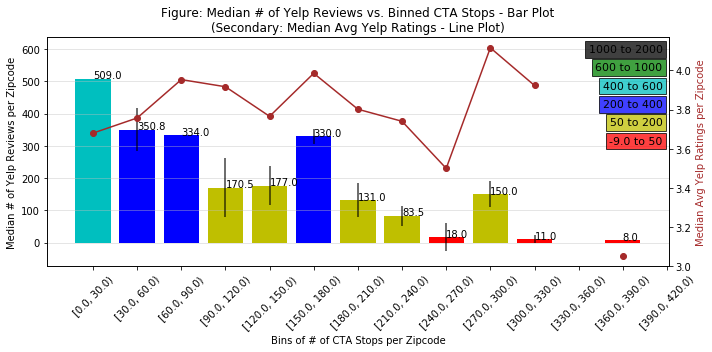

In [37]:
# 
plot_dict = {
    'chart_title':'Figure: Median # of Yelp Reviews vs. Binned CTA Stops - Bar Plot\n(Secondary: Median Avg Yelp Ratings - Line Plot)',
    'save_file':'../Chart/Median_Yelp_Reviews_vs_CTA_Stops_Bar_and_Secondary_Avg_Yelp_Ratings_Line.png',

    'data_df':c_cta_stop_bin_df,
    'data_sem_df':c_cta_stop_bin_sem_df,
    'y_label':'Median # of Yelp Reviews per Zipcode',
    'y_column':'Median Reviews',
    'color_list':'krybcgk',
    'color_thresh':[-9.0, 50, 200, 400, 600, 1000, 2000],

    'y2_label':'Median Avg Yelp Ratings per Zipcode',
    'y2_column':'Avg Rating',

    'x_label':'Bins of # of CTA Stops per Zipcode',
    'x_column':'Total CTA Stops Bin'
}

gen_bar_plot(plot_dict)

## Linear regression analysis to determine trend line characteristics for:
* The plot [Median # of Yelp Reviews per Zipcode vs. # of CTA Stops per Zipcode] seems to have the most obvious apparent correlation so far, so let's focus on this for now...

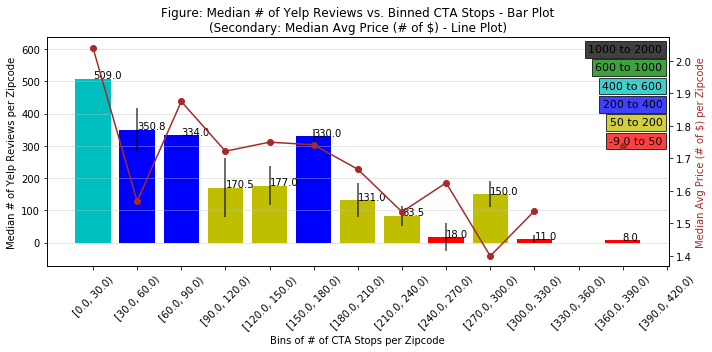

In [38]:
# 
plot_dict = {
    'chart_title':'Figure: Median # of Yelp Reviews vs. Binned CTA Stops - Bar Plot\n(Secondary: Median Avg Price (# of $) - Line Plot)',
    'save_file':'../Chart/Median_Yelp_Reviews_vs_CTA_Stops_Bar_and_Secondary_Avg_Price_Line.png',

    'data_df':c_cta_stop_bin_df,
    'data_sem_df':c_cta_stop_bin_sem_df,
    'y_label':'Median # of Yelp Reviews per Zipcode',
    'y_column':'Median Reviews',
    'color_list':'krybcgk',
    'color_thresh':[-9.0, 50, 200, 400, 600, 1000, 2000],

    'y2_label':'Median Avg Price (# of $) per Zipcode',
    'y2_column':'Avg Price (# of $)',

    'x_label':'Bins of # of CTA Stops per Zipcode',
    'x_column':'Total CTA Stops Bin'
}

gen_bar_plot(plot_dict)

In [39]:
# Let's check to see a reasonable range of bins for the regression analysis
c_cta_stop_bin_df

,Total CTA Stops Bin,Total Restaurants,Avg Rating,Total Reviews,Median Reviews,Avg Reviews,Avg Price (# of $)
0,"[0.0, 30.0)",25.0,3.680000,14205.0,509.00,568.200000,2.040000
1,"[30.0, 60.0)",12.5,3.757264,5067.5,350.75,388.977273,1.568182
2,"[60.0, 90.0)",32.0,3.953125,14871.0,334.00,464.718750,1.875000
3,"[90.0, 120.0)",24.0,3.916667,3949.0,170.50,172.444444,1.722222
4,"[120.0, 150.0)",23.0,3.765625,9344.0,177.00,201.578125,1.750000
5,"[150.0, 180.0)",72.0,3.985269,30771.0,330.00,440.514769,1.741792
6,"[180.0, 210.0)",26.0,3.801887,4438.0,131.00,158.000000,1.666667
7,"[210.0, 240.0)",22.5,3.740310,1922.0,83.50,99.708065,1.535714
8,"[240.0, 270.0)",13.0,3.500000,681.0,18.00,75.666667,1.625000
9,"[270.0, 300.0)",10.0,4.115385,1243.0,150.00,138.111111,1.400000


LinregressResult(slope=-40.554545454545455, intercept=408.6590909090909, rvalue=-0.8615006743675483, pvalue=0.0006538912172912892, stderr=7.967426943678029)


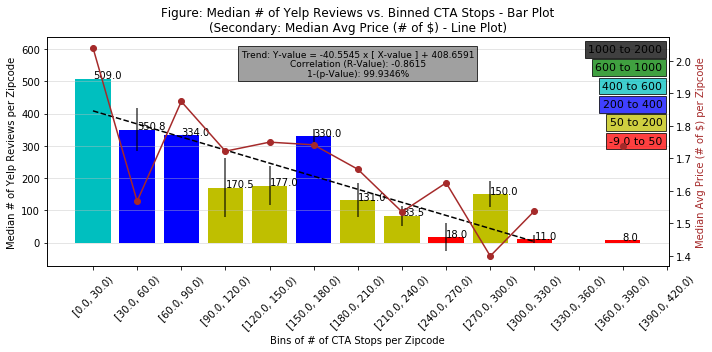

In [42]:
# Generate linear trend line
tl = gen_linear_trend( range(0,11), c_cta_stop_bin_df['Median Reviews'], 0, 11)

# Setup plot characteristics - including linear trend (dashed line) and moving average (dotted line)
plot_dict = {
    'chart_title':'Figure: Median # of Yelp Reviews vs. Binned CTA Stops - Bar Plot\n(Secondary: Median Avg Price (# of $) - Line Plot)',
    'save_file':'../Chart/Median_Yelp_Reviews_vs_CTA_Stops_Bar_and_Secondary_Avg_Price_Line.png',

    'data_df':c_cta_stop_bin_df,
    'data_sem_df':c_cta_stop_bin_sem_df,
    'y_label':'Median # of Yelp Reviews per Zipcode',
    'y_column':'Median Reviews',
    'color_list':'krybcgk',
    'color_thresh':[-9.0, 50, 200, 400, 600, 1000, 2000],

    'data_trend': tl['trend_line'],
    'data_trend_label': tl['trend_label'],
    'data_trend_label_loc_h': 0.5,
    'data_trend_label_loc_v': 0.95,
    
    'y2_label':'Median Avg Price (# of $) per Zipcode',
    'y2_column':'Avg Price (# of $)',

    'x_label':'Bins of # of CTA Stops per Zipcode',
    'x_column':'Total CTA Stops Bin'
}

# Generate the bar plot
gen_bar_plot(plot_dict)

## Create a Google Maps plot if interesting Yelp metrics noted above:
* Symbol layer of all of the Zipcode lat/long coordinates, with the Symbol size determined by a Yelp metric.
* Symbol labels providing the key Yelp metric.
* Symbol info boxes providing additional Yelp metric and the associated # of Chicago CTA Stops for each zipcode.
* A heat map layer of the # of Chicago CTA Stops

LinregressResult(slope=-0.9575010078401611, intercept=354.902996184715, rvalue=-0.5212604732554644, pvalue=4.493717288991988e-05, stderr=0.21532672974495018)


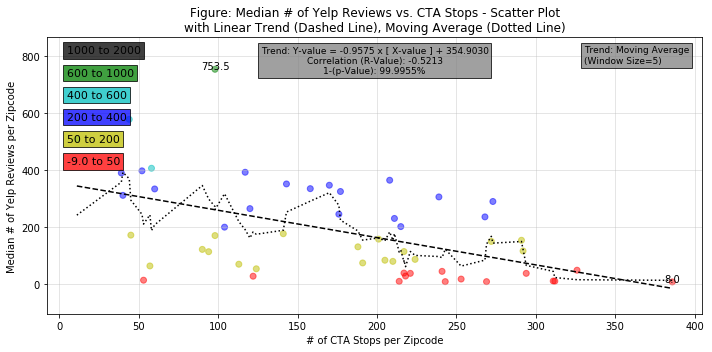

In [44]:
# Generate linear trend line
tl = gen_linear_trend( list(merged_rest_df['Total CTA Stops']), list(merged_rest_df['Median Reviews']) )

# Setup plot characteristics - including linear trend (dashed line) and moving average (dotted line)
plot_dict = {
    'chart_title':'Figure: Median # of Yelp Reviews vs. CTA Stops - Scatter Plot\nwith Linear Trend (Dashed Line), Moving Average (Dotted Line)',
    'save_file':'../Chart/Median_Yelp_Reviews_vs_CTA_Stops_Scatter_and_Linear_Trend_Line.png',

    'data_df':merged_rest_df,
    'y_label':'Median # of Yelp Reviews per Zipcode',
    'y_column':'Median Reviews',
    'color_list':'krybcgk',
    'color_thresh':[-9.0, 50, 200, 400, 600, 1000, 2000],

    'data_trend': tl['trend_line'],
    'data_trend_label': tl['trend_label'],
    'data_trend_label_loc_h': 0.5,
    'data_trend_label_loc_v': 0.97,
    
    'ma_window_size':5,
    'ma_label_loc_h': 0.82,
    'ma_label_loc_v': 0.90,

    'x_label':'# of CTA Stops per Zipcode',
    'x_column':'Total CTA Stops'
}

# Generate the scatter plot
gen_scatter_plot(plot_dict)

In [45]:
# Access Google Maps with API key
gmaps.configure(api_key=key_gmaps)

In [46]:
# Draw a map with markers on the lat/long for each zipcode

In [47]:
# Marker locations for each zip code
zip_marker_locations = merged_rest_df[['Latitude','Longitude']]

In [48]:
# Generate a symbol plot layer for each zipcode
# Marker info box content
zip_info_boxes = [
    f"""<p>Zipcode: {zi}<br />
    # CTA Stops: {int(merged_rest_df['Total CTA Stops'][zi]):d}<br />
    Median # of Yelp Reviews: {merged_rest_df['Median Reviews'][zi]}</p>""" for zi in merged_rest_df.index ]

# Colors of the markers
zip_marker_fill_colors = 'white'
zip_marker_stroke_colors = 'blue'

# Relative size of the markers
#zip_marker_scale = [ int(2+v/np.percentile(merged_rest_df['Median Reviews'],70) ) for v in merged_rest_df['Median Reviews'] ]


# Set the size of the markers to be relative to the value
v_min = min(merged_rest_df['Median Reviews'])
v_max = max(merged_rest_df['Median Reviews'])
v_range = v_max - v_min
s_min = 1
s_max = 5
s_range = s_max - s_min

zip_marker_scale = [ int( (v-v_min) * s_range/v_range + s_min ) for v in merged_rest_df['Median Reviews'] ]



In [49]:
# Generate a zipcode symbol plot layer
zip_markers = gmaps.symbol_layer(
                zip_marker_locations,
                info_box_content = zip_info_boxes,
                fill_color = zip_marker_fill_colors,
                stroke_color = zip_marker_stroke_colors,
                scale = zip_marker_scale
                )

In [50]:
# Generate a heatmap layer based upon # of CTA Stops per zipcode
# cta_stop_weights = [ float( 0.5 + v/np.percentile(merged_rest_df['Total CTA Stops'], 50) ) for v in merged_rest_df['Total CTA Stops'] ]

In [51]:
# Generate a heatmap layer based upon the full list of CTA stops
# Read in the full list of CTA stops
cta_stops_df = pd.read_csv("../Data/chicago_cta_stops.csv")
cta_stops_df.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding,postal_code
0,1,1.0,Jackson & Austin Terminal,"Jackson & Austin Terminal, Northeastbound, Bus...",41.876322,-87.774105,0,NaN,1,60304
1,2,2.0,5900 W Jackson,"5900 W Jackson, Eastbound, Southside of the St...",41.877067,-87.771318,0,NaN,1,60644
2,3,3.0,Jackson & Menard,"Jackson & Menard, Eastbound, Southside of the ...",41.876957,-87.769750,0,NaN,1,60644
3,4,4.0,5700 W Jackson,"5700 W Jackson, Eastbound, Southside of the St...",41.877024,-87.767451,0,NaN,1,60644
4,6,6.0,Jackson & Lotus,"Jackson & Lotus, Eastbound, Southeast Corner",41.876513,-87.761446,0,NaN,1,60644


In [52]:
# Generate CTA stop lat/long locations
cta_stop_locations = cta_stops_df[['stop_lat','stop_lon']]

In [53]:
cta_stop_heat_layer = gmaps.heatmap_layer(
                cta_stop_locations,
#               point_radius = 10,
#               max_intensity = max(num_cta_stops),
                opacity = .6,
                dissipating = True
                )

In [54]:
# Setup the Google Map figure
gmaps_fig = gmaps.figure()
gmaps_fig.add_layer(zip_markers)
gmaps_fig.add_layer(cta_stop_heat_layer)

# Display the Google Map
gmaps_fig

Figure(layout=FigureLayout(height='420px'))

#### Get a similar Google Maps plot for Median Average Yelp Rating per Zipcode

In [55]:
# Generate a symbol plot layer for each zipcode
# Marker info box content
zip_info_boxes = [
    f"""<p>Zipcode: {zi}<br />
    # CTA Stops: {int(merged_rest_df['Total CTA Stops'][zi]):d}<br />
    Median Avg Yelp Rating: {merged_rest_df['Avg Rating'][zi]:.2f}</p>""" for zi in merged_rest_df.index ]

# Colors of the markers
zip_marker_fill_colors = 'white'
zip_marker_stroke_colors = 'blue'

# Set the size of the markers to be relative to the value
v_min = min(merged_rest_df['Avg Rating'])
v_max = max(merged_rest_df['Avg Rating'])
v_range = v_max - v_min
s_min = 1
s_max = 5
s_range = s_max - s_min

zip_marker_scale = [ int( (v-v_min) * s_range/v_range + s_min ) for v in merged_rest_df['Avg Rating'] ]

In [56]:
# Generate a zipcode symbol plot layer
zip_markers = gmaps.symbol_layer(
                zip_marker_locations,
                info_box_content = zip_info_boxes,
                fill_color = zip_marker_fill_colors,
                stroke_color = zip_marker_stroke_colors,
                scale = zip_marker_scale
                )

In [57]:
# Setup the Google Map figure
gmaps_fig = gmaps.figure()
gmaps_fig.add_layer(zip_markers)
gmaps_fig.add_layer(cta_stop_heat_layer)

# Display the Google Map
gmaps_fig

Figure(layout=FigureLayout(height='420px'))

#### Now, plot only the 5 zipcodes of interest

In [58]:
# The 5 zip codes that represent the peak in Median Avg Yelp Rating for Zipcodes with 270-300 CTA stops
peak_ratings_df = merged_rest_df[ merged_rest_df['Total CTA Stops Bin'] == pd.Interval(270.0, 300.0, closed='left') ]
peak_ratings_df

,Total Restaurants,Avg Rating,Total Reviews,Median Reviews,Avg Reviews,Avg Price (# of $),Total CTA Stops,Latitude,Longitude,Total CTA Stops Bin
zip,,,,,,,,,,
60609,2,4.500000,76,38.0,38.000000,1.000000,294.0,41.812680,-87.656935,"[270.0, 300.0)"
60612,9,4.111111,1243,150.0,138.111111,1.333333,272.0,41.880320,-87.687749,"[270.0, 300.0)"
60623,10,4.350000,1104,116.5,110.400000,1.400000,292.0,41.848897,-87.717661,"[270.0, 300.0)"
60641,25,3.720000,4492,154.0,179.680000,1.800000,291.0,41.946606,-87.746787,"[270.0, 300.0)"
60647,78,4.115385,31908,290.0,409.076923,1.897436,273.0,41.921215,-87.701028,"[270.0, 300.0)"


In [59]:
# Marker locations for each zip code
zip_marker_locations = peak_ratings_df[['Latitude','Longitude']]

In [60]:
# Generate a symbol plot layer for each zipcode
# Marker info box content
zip_info_boxes = [
    f"""<p>Zipcode: {zi}<br />
    # CTA Stops: {int(peak_ratings_df['Total CTA Stops'][zi]):d}<br />
    Median Avg Yelp Rating: {peak_ratings_df['Avg Rating'][zi]:.2f}</p>""" for zi in peak_ratings_df.index ]

# Colors of the markers
zip_marker_fill_colors = 'white'
zip_marker_stroke_colors = 'blue'

# Set the size of the markers to be relative to the value
v_min = min(peak_ratings_df['Avg Rating'])
v_max = max(peak_ratings_df['Avg Rating'])
v_range = v_max - v_min
s_min = 2
s_max = 5
s_range = s_max - s_min

zip_marker_scale = [ int( (v-v_min) * s_range/v_range + s_min ) for v in peak_ratings_df['Avg Rating'] ]

In [61]:
zip_marker_scale

[5, 3, 4, 2, 3]

In [62]:
# Generate a zipcode symbol plot layer
zip_markers = gmaps.symbol_layer(
                zip_marker_locations,
                info_box_content = zip_info_boxes,
                fill_color = zip_marker_fill_colors,
                stroke_color = zip_marker_stroke_colors,
                scale = zip_marker_scale
                )

In [63]:
# Setup the Google Map figure
gmaps_fig = gmaps.figure()
gmaps_fig.add_layer(zip_markers)
gmaps_fig.add_layer(cta_stop_heat_layer)

# Display the Google Map
gmaps_fig

Figure(layout=FigureLayout(height='420px'))